# Gini score

In [1]:
import os
import sys
import warnings
warnings.filterwarnings("ignore")
from pathlib import Path

package_root = os.path.dirname(os.getcwd())
sys.path.insert(0, package_root)

import torch
torch.manual_seed(42)
import torch.nn.functional as nnF
import torchvision.transforms.functional as F
import torchvision.transforms as pth_transforms

import numpy as np
np.random.seed(42)
from PIL import Image
import matplotlib.pyplot as plt
plt.rcParams["savefig.bbox"] = 'tight'
import matplotlib.patches as patches

import seaborn as sns
sns.set(font_scale=1.4)
sns.set_style("white", {
    "axes.edgecolor": '#475569',
    'font.family': ['sans-serif'],
    'font.sans-serif': ['Arial',
        'Droid Sans',
        'sans-serif'
    ],
})

%matplotlib inline

from sparse_detector.utils.metrics import gini_sorted

In [27]:
def gini_coefficient(x):
    """Compute Gini coefficient of array of values"""
    diffsum = 0
    for i, xi in enumerate(x[:-1], 1):
        diffsum += np.sum(np.abs(xi - x[i:]))
    return diffsum / (len(x)**2 * np.mean(x))

**Uniform distribution**

0.33529250922148135


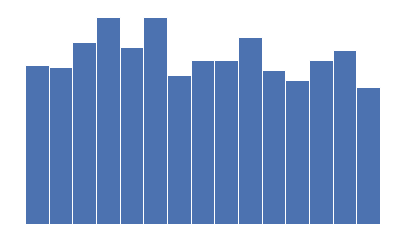

In [61]:
s = np.random.uniform(0, 1, 1000)

fig, ax = plt.subplots(figsize=(7, 4))
count, bins, ignored = ax.hist(s, bins=15)
ax.axis('off')
fig.savefig("images/presentations/uniform_distributions.png", bbox_inches="tight")
print(gini_coefficient(s))

**Weibull distribution**

0.49943668088164367


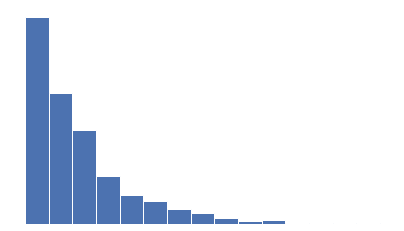

In [63]:
shape, scale = 1, 2  # mean=4, std=2*sqrt(2)]
s = np.random.gamma(shape, scale, 1000)

fig, ax = plt.subplots(figsize=(7, 4))
count, bins, ignored = plt.hist(s, bins=15)
ax.axis('off')
fig.savefig("images/presentations/gamma_distributions.png", bbox_inches="tight")
print(gini_coefficient(s))

In [20]:
t = torch.from_numpy(s).unsqueeze(0)
gini_sorted(t)

tensor(0.1250, dtype=torch.float64)